<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DES DONNEES</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies et chargement des fichiers</h3>
</div>

In [3]:
#Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [4]:
#Importation du fichier customers, products et transactions
clients = pd.read_csv("../Data/customers.csv", sep=";")
produits = pd.read_csv("../Data/products.csv" , sep=";")
trans = pd.read_csv("../Data/Transactions.csv")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Préparation des fichiers</h3>
</div>

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
print(clients.shape)
print(produits.shape)
print(trans.shape)


(8621, 3)
(3286, 3)
(687534, 4)


In [6]:
trans['date'] = trans['date'].str.slice(0, 10)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Jointures des fichiers et ordre</h3>
</div>

In [ ]:
join = pd.merge(trans, produits, on='id_prod', how='inner')
df = pd.merge(join, clients, on='client_id', how='inner')
print(df)

       id_prod        date session_id client_id  price  categ sex  birth
0       0_1259  2021-03-01        s_1     c_329  11.99      0   f   1967
1       0_1390  2021-03-01        s_2     c_664  19.37      0   m   1960
2       0_1352  2021-03-01        s_3     c_580   4.50      0   m   1988
3       0_1458  2021-03-01        s_4    c_7912   6.55      0   f   1989
4       0_1358  2021-03-01        s_5    c_2033  16.49      0   f   1956
...        ...         ...        ...       ...    ...    ...  ..    ...
687529   1_508  2023-02-28   s_348444    c_3573  21.92      1   f   1996
687530    2_37  2023-02-28   s_348445      c_50  48.99      2   f   1994
687531   1_695  2023-02-28   s_348446     c_488  26.99      1   f   1985
687532  0_1547  2023-02-28   s_348447    c_4848   8.99      0   m   1953
687533  0_1398  2023-02-28   s_348435    c_3575   4.52      0   f   1981

[687534 rows x 8 columns]


In [8]:
# on classe par date et on ajoute la colonne ID
df = df.sort_values(by='date', ascending=True)
df['id'] = range(1, len(df) + 1)
print(df.dtypes)
dc = df

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ           int64
sex            object
birth           int64
id              int64
dtype: object


In [9]:
#création des colonnes ageClient, trancheAge, anneeVente
df['AnneeVente'] = df['date'].str[:4]

current_year = datetime.now().year
df['AgeClient'] =  current_year - df['birth']

def assign_tranche(age):
    if age <= 25:
        return "25 ans et moins"
    elif 26 <= age <= 35:
        return "26 à 35 ans"
    elif 35 < age <= 45:
        return "36 à 45 ans"
    elif 45 < age <= 55:
        return "46 à 55 ans"
    elif 55 < age <= 65:
        return "56 à 65 ans"
    elif 65 < age <= 75:
        return "66 à 75 ans"
    else:
        return "Plus de 75 ans"

df['trancheAge'] = df['AgeClient'].apply(assign_tranche)
df['trancheAge'].value_counts()

trancheAge
36 à 45 ans        229244
46 à 55 ans        177528
56 à 65 ans         88355
26 à 35 ans         83199
66 à 75 ans         50378
25 ans et moins     33606
Plus de 75 ans      25224
Name: count, dtype: int64

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse du DataFrame</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Graphiques autour du chiffre d'affaires</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Chiffre d'affaires avec moyenne mobile</h3>
</div>

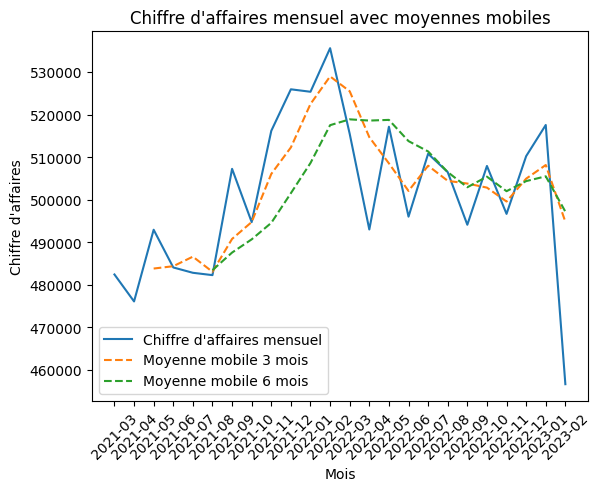

In [10]:
# Convertir la colonne 'date' en type datetime
df['date'] = pd.to_datetime(df['date'])
# Créer une colonne 'mois' pour regrouper par mois
df['mois'] = df['date'].dt.to_period('M')

# Calculer le total des ventes (price) par mois
df_monthly = df.groupby('mois')['price'].sum().reset_index()

# Calculer la moyenne mobile sur 3 mois
df_monthly['moyenne_mobile_3'] = df_monthly['price'].rolling(window=3).mean()

# Calculer la moyenne mobile sur 6 mois
df_monthly['moyenne_mobile_6'] = df_monthly['price'].rolling(window=6).mean()

# Tracer le graphique
plt.plot(df_monthly['mois'].astype(str), df_monthly['price'], label='Chiffre d\'affaires mensuel')
plt.plot(df_monthly['mois'].astype(str), df_monthly['moyenne_mobile_3'], label='Moyenne mobile 3 mois', linestyle='--')
plt.plot(df_monthly['mois'].astype(str), df_monthly['moyenne_mobile_6'], label='Moyenne mobile 6 mois', linestyle='--')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires mensuel avec moyennes mobiles')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2 - Chiffre d’affaires par catégorie</h3>
</div>

In [11]:
# Grouper par catégorie et année, puis calculer la somme des prix
resultat = df.groupby(['categ', 'AnneeVente'])['price'].sum().reset_index()

# Afficher le résultat
print(resultat)

   categ AnneeVente       price
0      0       2021  1883020.45
1      0       2022  2192970.46
2      0       2023   343740.06
3      1       2021  1951930.27
4      1       2022  2485275.19
5      1       2023   390451.65
6      2       2021  1109810.26
7      2       2022  1430436.16
8      2       2023   240028.60


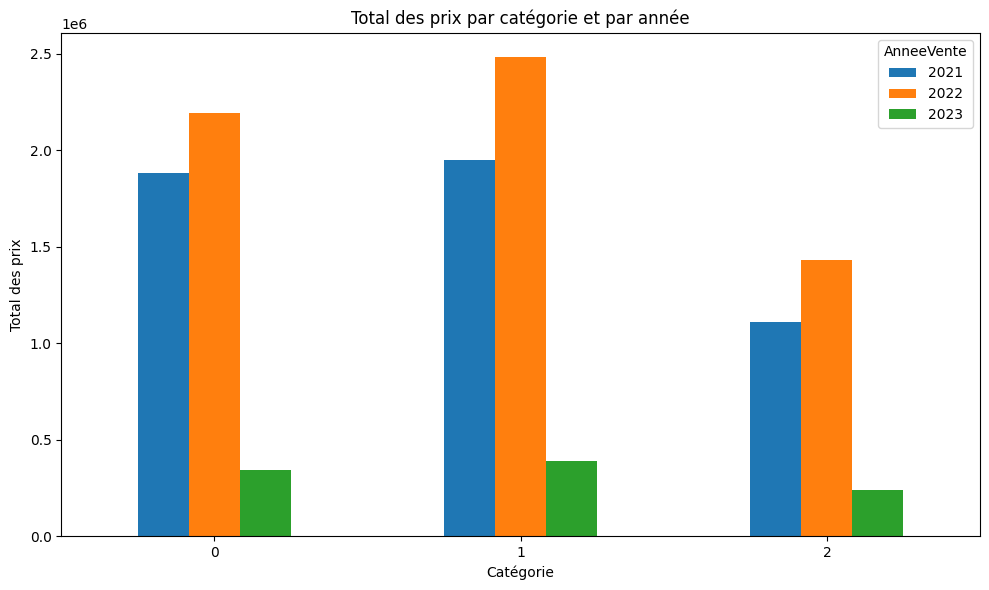

In [12]:
# Grouper par catégorie et année, puis calculer la somme des prix
resultat = df.groupby(['categ', 'AnneeVente'])['price'].sum().unstack().fillna(0)

# Création du graphique en barres
resultat.plot(kind='bar', figsize=(10, 6))

# Ajouter des titres et des labels
plt.title('Total des prix par catégorie et par année')
plt.xlabel('Catégorie')
plt.ylabel('Total des prix')
plt.xticks(rotation=0)
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.3 - nombre de clients par mois</h3>
</div>

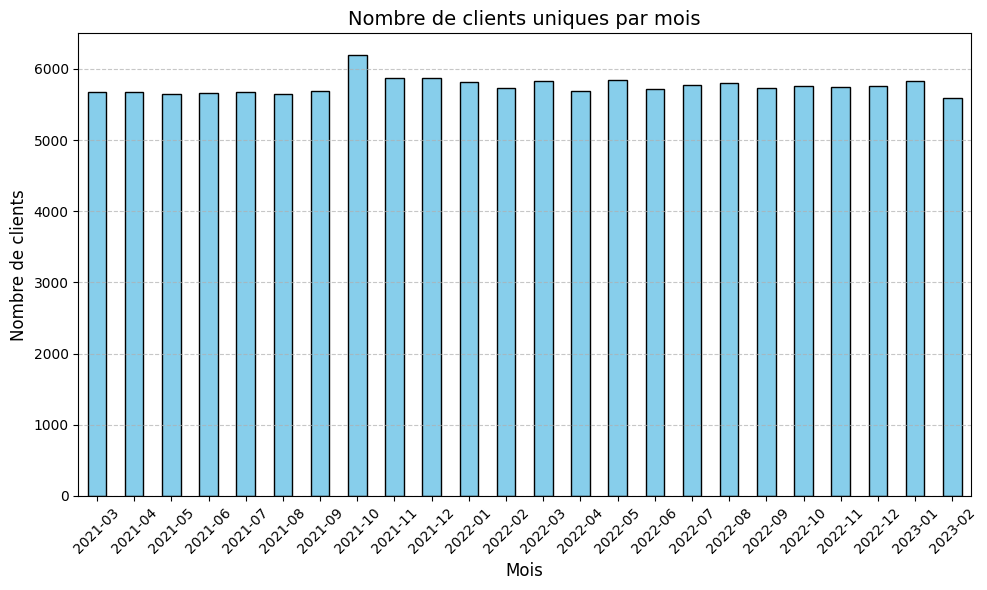

In [13]:
# Grouper par mois et compter les clients uniques
monthly_clients = df.groupby('mois')['client_id'].nunique()

# Tracer le graphique
plt.figure(figsize=(10, 6))
monthly_clients.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Nombre de clients uniques par mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.4 - Nombre de transactions par mois et par an</h3>
</div>

mois
2021-03    14201
2021-04    13970
2021-05    14168
2021-06    13838
2021-07    13571
Freq: M, Name: session_id, dtype: int64
int64


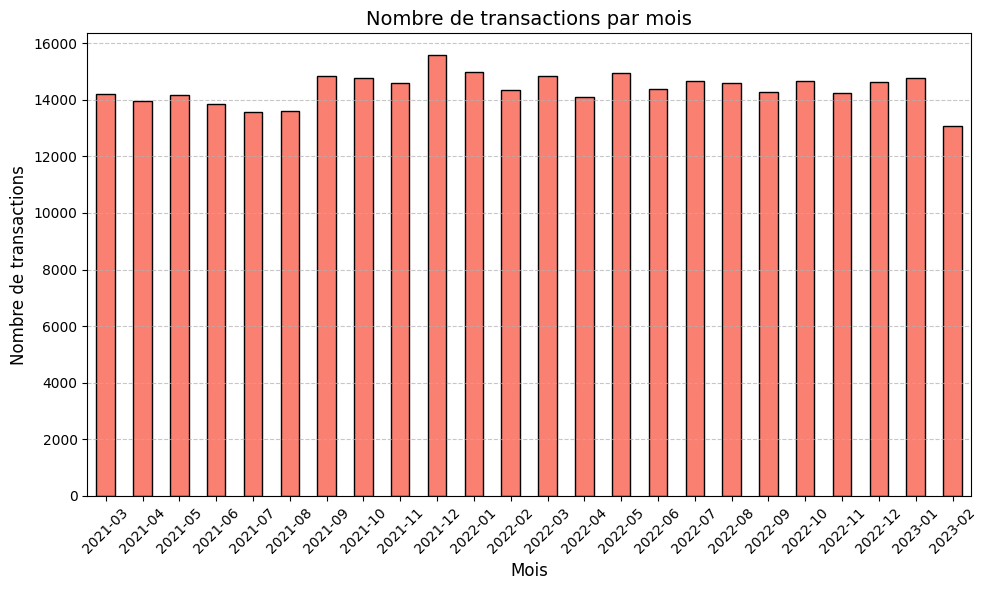

In [14]:
# Grouper par mois et compter les transactions
monthly_transactions = df.groupby('mois')['session_id'].unique()

# Compter les session_id uniques par mois
monthly_transactions = df.groupby('mois')['session_id'].nunique()

# Vérifier les données
print(monthly_transactions.head())  
print(monthly_transactions.dtypes)

# Tracer le graphique
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Nombre de transactions par mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

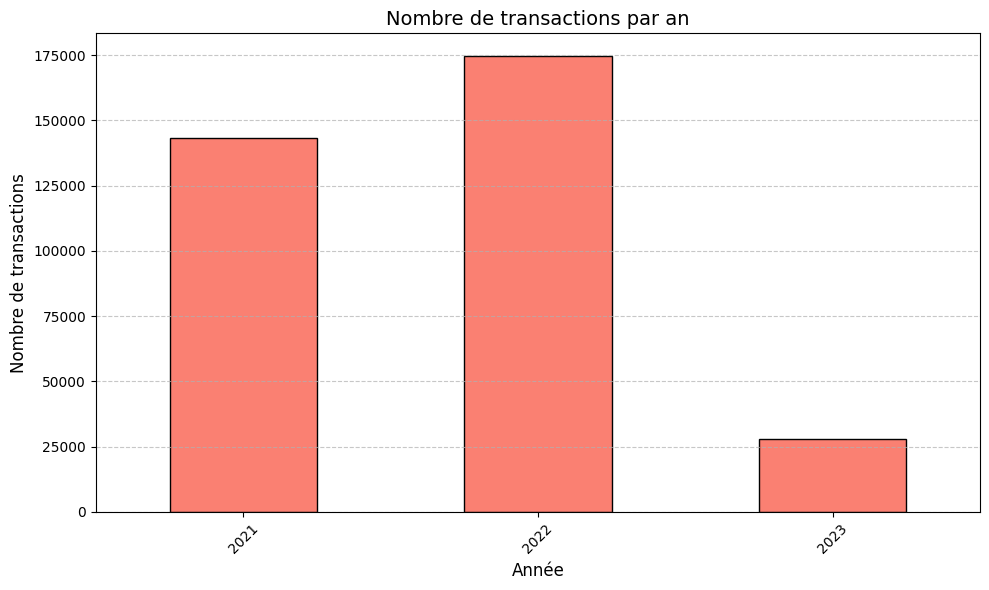

In [15]:
# Compter les session_id uniques par année
monthly_transactions = df.groupby('AnneeVente')['session_id'].nunique()


# Tracer le graphique
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Nombre de transactions par an', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.5 - Nombre de produits vendus par mois et par an</h3>
</div>

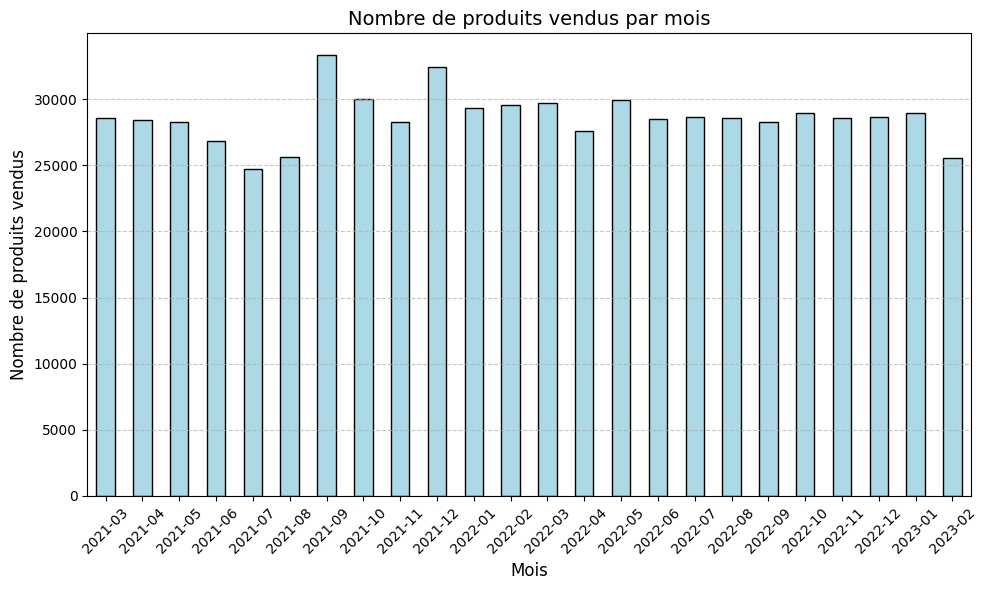

In [16]:
monthly_products_sold = df.groupby('mois')['id_prod'].count()  # Compter les produits vendus
# Tracer le graphique
plt.figure(figsize=(10, 6))
monthly_products_sold.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Nombre de produits vendus par mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de produits vendus', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

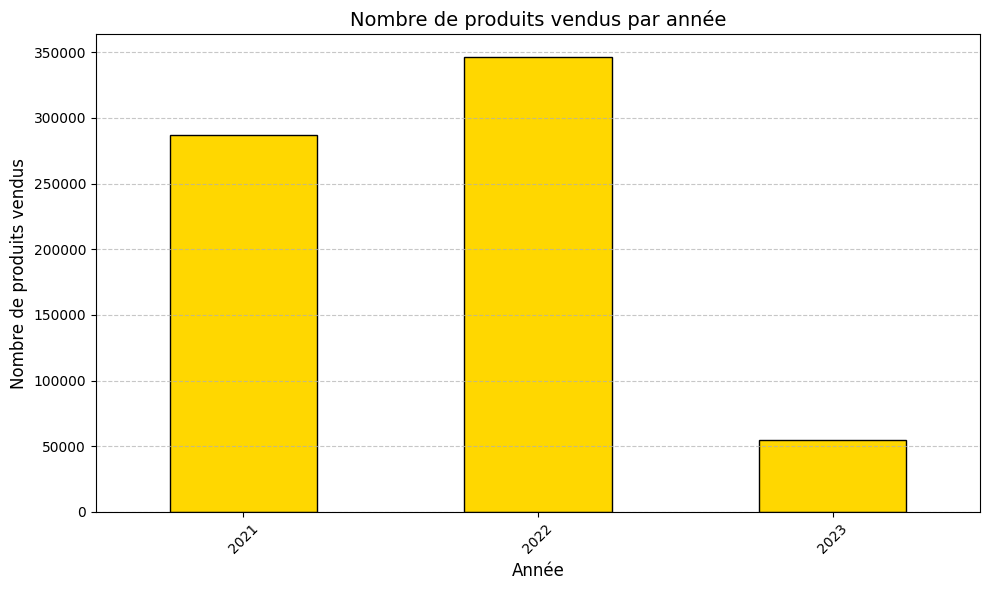

In [17]:
annual_products_sold = df.groupby('AnneeVente')['id_prod'].count()  # Compter les produits vendus
plt.figure(figsize=(10, 6))
annual_products_sold.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Nombre de produits vendus par année', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de produits vendus', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.6 - Le top 10 des produits vendues par an</h3>
</div>

In [18]:
print(df.columns)

Index(['id_prod', 'date', 'session_id', 'client_id', 'price', 'categ', 'sex', 'birth', 'id', 'AnneeVente', 'AgeClient', 'trancheAge', 'mois'], dtype='object')


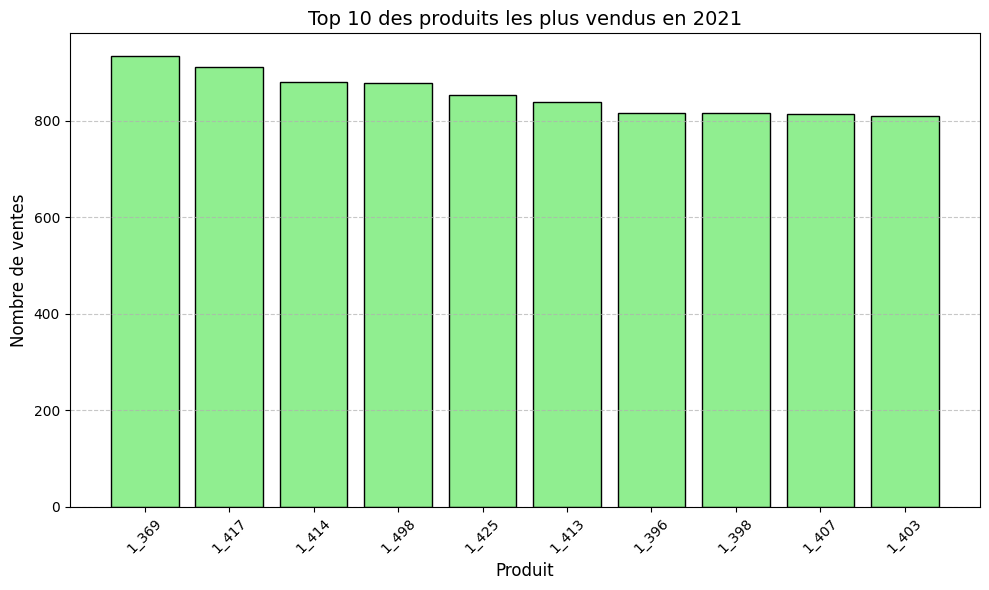

In [19]:
# Grouper par année et produit, puis compter les ventes de chaque produit
product_sales_per_year = df.groupby(['AnneeVente', 'id_prod']).size().reset_index(name='sales')

# Obtenir le top 10 des produits les plus vendus pour chaque année
top_10_products_per_year = product_sales_per_year.sort_values('sales', ascending=False) \
    .groupby('AnneeVente').head(10)

# Exemple de graphique pour une année spécifique
year_to_plot = '2021'
top_products_for_year = top_10_products_per_year[top_10_products_per_year['AnneeVente'] == year_to_plot]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(top_products_for_year['id_prod'], top_products_for_year['sales'], color='lightgreen', edgecolor='black')
plt.title(f'Top 10 des produits les plus vendus en {year_to_plot}', fontsize=14)
plt.xlabel('Produit', fontsize=12)
plt.ylabel('Nombre de ventes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


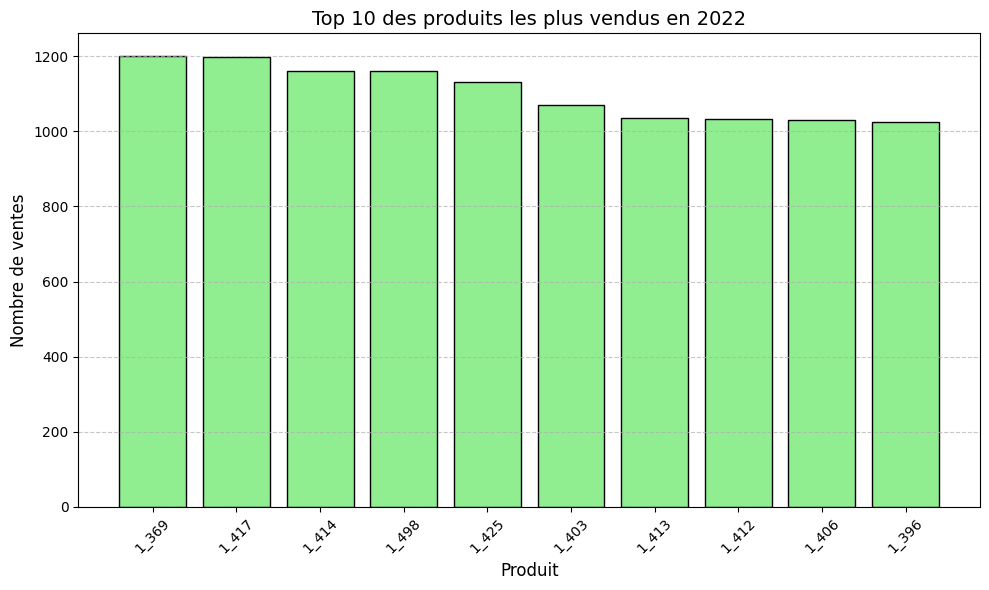

In [20]:
year_to_plot = '2022'
top_products_for_year = top_10_products_per_year[top_10_products_per_year['AnneeVente'] == year_to_plot]

plt.figure(figsize=(10, 6))
plt.bar(top_products_for_year['id_prod'], top_products_for_year['sales'], color='lightgreen', edgecolor='black')
plt.title(f'Top 10 des produits les plus vendus en {year_to_plot}', fontsize=14)
plt.xlabel('Produit', fontsize=12)
plt.ylabel('Nombre de ventes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


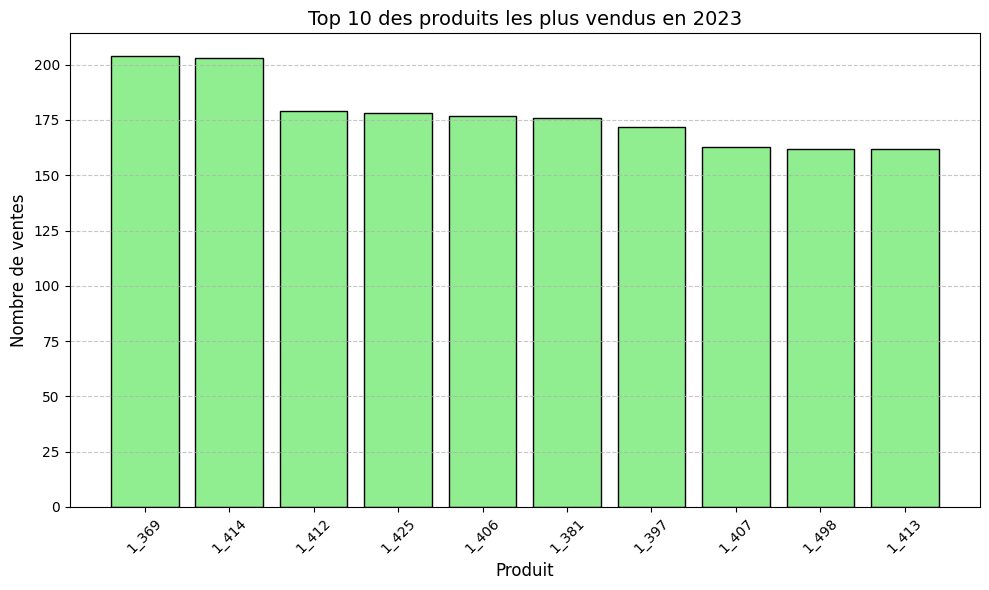

In [21]:
year_to_plot = '2023'
top_products_for_year = top_10_products_per_year[top_10_products_per_year['AnneeVente'] == year_to_plot]

plt.figure(figsize=(10, 6))
plt.bar(top_products_for_year['id_prod'], top_products_for_year['sales'], color='lightgreen', edgecolor='black')
plt.title(f'Top 10 des produits les plus vendus en {year_to_plot}', fontsize=14)
plt.xlabel('Produit', fontsize=12)
plt.ylabel('Nombre de ventes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.7 - Les flops, produits vendu qu'une fois par an</h3>
</div>

In [22]:
product_sales_per_year = df.groupby(['AnneeVente', 'id_prod']).size().reset_index(name='sales')

# Filtrer uniquement les produits vendus une seule fois
one_sale_products_per_year = product_sales_per_year[product_sales_per_year['sales'] == 1]

# Extraire sous forme de dictionnaire {année: [id_prod, ...]}
flop_products_per_year = one_sale_products_per_year.groupby('AnneeVente')['id_prod'].apply(list).to_dict()

# Trouver le nombre max d'éléments pour aligner les colonnes
max_length = max(len(products) for products in flop_products_per_year.values())

# Compléter les listes avec des valeurs vides pour uniformiser la longueur
for year in flop_products_per_year:
    flop_products_per_year[year] += [""] * (max_length - len(flop_products_per_year[year]))

# Transformer en DataFrame pour affichage
df_flops = pd.DataFrame(flop_products_per_year)

# Affichage du tableau
print(df_flops.to_string(index=False))


  2021   2022   2023
0_1074 0_1012  0_100
0_1101 0_1032 0_1005
0_1116 0_1037 0_1006
0_1120 0_1116 0_1010
0_1151 0_1141 0_1019
0_1165 0_1171  0_102
0_1231 0_1191 0_1032
0_1233 0_1233  0_106
0_1271 0_1237 0_1084
0_1279 0_1279 0_1088
0_1284 0_1305 0_1092
0_1331 0_1439  0_110
0_1379 0_1463 0_1109
0_1423  0_147  0_111
0_1456 0_1498 0_1120
0_1462 0_1500 0_1129
0_1478 0_1511  0_113
0_1484 0_1535 0_1138
0_1492 0_1544 0_1146
0_1539 0_1570  0_115
0_1544 0_1610  0_119
0_1549 0_1633 0_1203
0_1552 0_1711 0_1211
0_1582 0_1715 0_1214
0_1601 0_1716 0_1217
0_1650 0_1726 0_1231
0_1683 0_1735 0_1235
0_1728 0_1759 0_1239
0_1794 0_1776 0_1241
0_1803 0_1778 0_1251
0_1840 0_1803 0_1271
0_1842 0_1844 0_1327
0_1858 0_1848 0_1337
0_1864 0_1855 0_1359
0_1871 0_1871 0_1374
0_1917 0_1900 0_1389
0_1936 0_1920 0_1415
0_1993 0_1978  0_143
0_2081 0_2010  0_144
0_2125 0_2040 0_1444
0_2149 0_2177 0_1463
0_2201 0_2260 0_1466
 0_362  0_234  0_147
 0_419  0_242 0_1497
 0_448  0_247 0_1500
 0_453  0_349 0_1510
 0_472  0_401

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.5 - Répartition des ventes par catégories</h3>
</div>

categ            0       1      2
AnneeVente                       
2021        176984   95139  14548
2022        206152  121412  18816
2023         32323   19041   3119


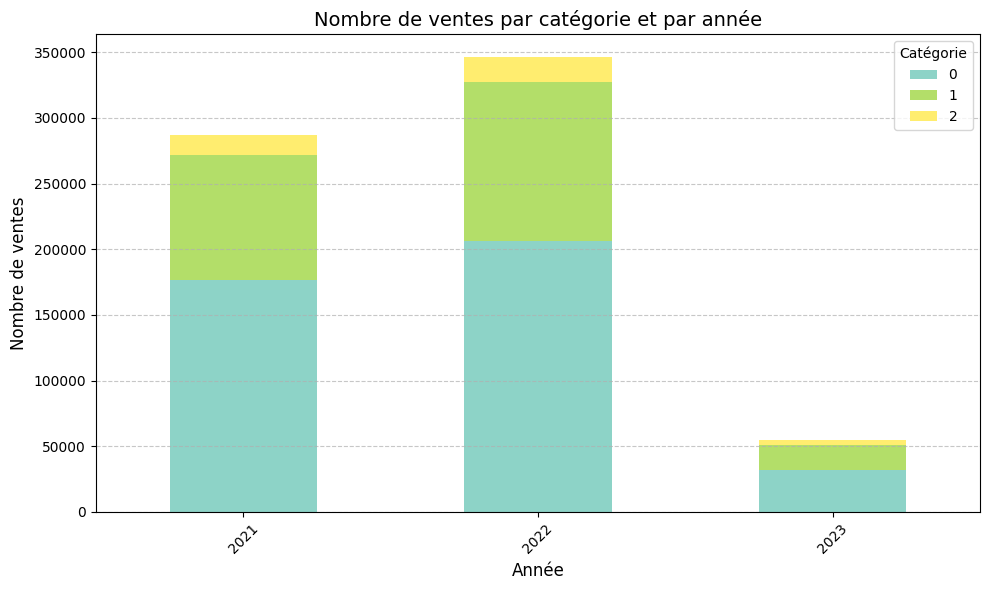

In [23]:
# Grouper par année et catégorie et compter les ventes
sales_by_year_and_category = df.groupby(['AnneeVente', 'categ']).size().unstack(fill_value=0)

# Afficher les résultats
print(sales_by_year_and_category)

# Tracer le graphique
sales_by_year_and_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Nombre de ventes par catégorie et par année', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de ventes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Catégorie')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.6 - Courbe de Lorenz</h3>
</div>

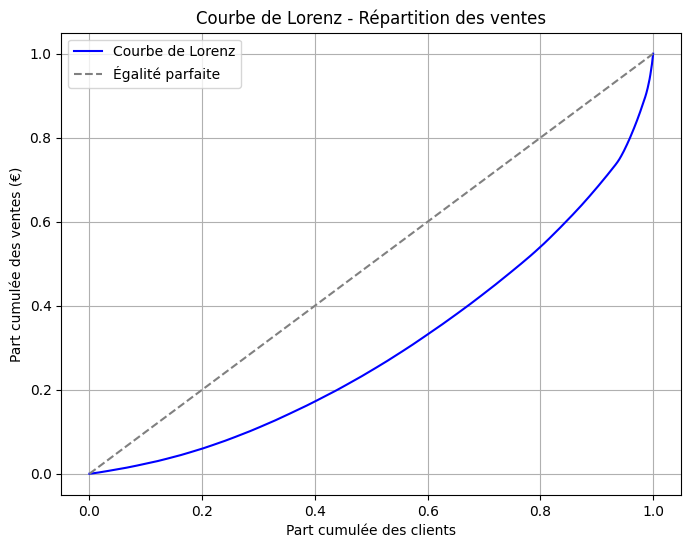

In [24]:
df = df.sort_values(by="price")  # Trier les prix par ordre croissant

# Calculer la part cumulée des ventes
df["cum_price"] = df["price"].cumsum() / df["price"].sum()
df["cum_clients"] = np.arange(1, len(df) + 1) / len(df)

# Tracer la courbe de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(df["cum_clients"], df["cum_price"], label="Courbe de Lorenz", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Égalité parfaite")  # Diagonale

plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée des ventes (€)")
plt.title("Courbe de Lorenz - Répartition des ventes")
plt.legend()
plt.grid()
plt.show()

La courbe est très incurvée, ce qui indique que la majorité des clients achètent très peu, tandis qu'une minorité achète beaucoup (phénomène typique en commerce et marketing).

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Corrélation </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Lien entre le genre d'un client et les catégories des livres achetés
</h3>
</div>

In [25]:
# Créer un tableau croisé  
contingency_table = pd.crosstab(df['sex'], df['categ'])  
print(contingency_table)

categ       0       1      2
sex                         
f      206103  119307  17283
m      209356  116285  19200


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Lien entre l'age des clients et le montant total d'achats
</h3>
</div>

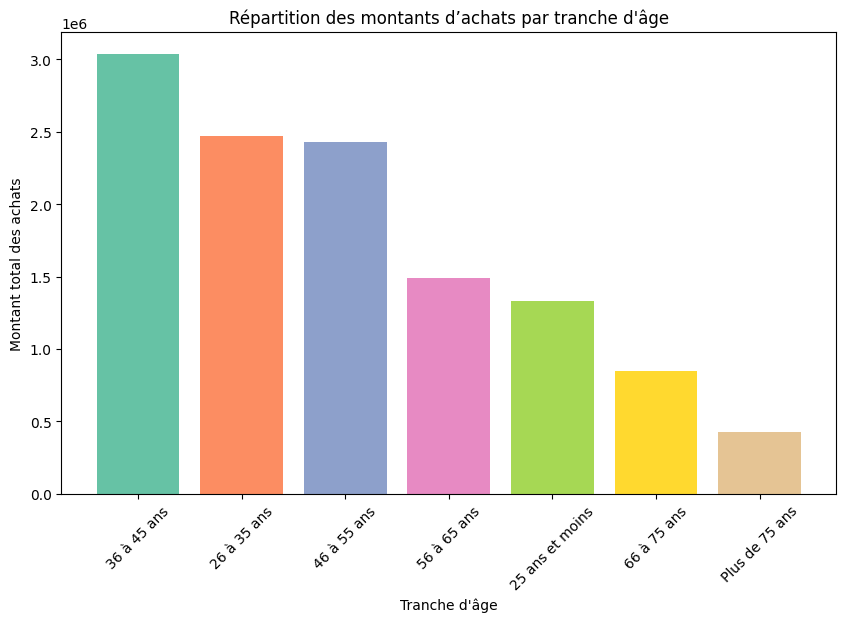

In [26]:
age_price_group = df.groupby('trancheAge')['price'].sum().reset_index() 

# Trier par montant total  
age_price_group = age_price_group.sort_values(by="price", ascending=False)

# Définir la palette de couleurs  
palette = sns.color_palette("Set2", len(age_price_group))

# Créer le graphique  
plt.figure(figsize=(10, 6))  
bars = plt.bar(age_price_group['trancheAge'], age_price_group['price'], color=palette)


plt.title("Répartition des montants d’achats par tranche d'âge")  
plt.xlabel("Tranche d'âge")  
plt.ylabel("Montant total des achats")  
plt.xticks(rotation=45)  
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Lien entre l'âge des clients et la fréquence d'achat
</h3>
</div>

In [27]:
# Regrouper par 'client_id' et 'session_id' et ne garder qu'une vente par session
df_sessions = df.drop_duplicates(subset=['session_id', 'client_id'])

# Trier les données par client et par date de session
df_sessions = df_sessions.sort_values(by=['client_id', 'date'])

# Calculer l'intervalle entre les sessions pour chaque client
df_sessions['previous_date'] = df_sessions.groupby('client_id')['date'].shift(1)
df_sessions['session_interval'] = (df_sessions['date'] - df_sessions['previous_date']).dt.days

# Supprimer les lignes où 'session_interval' est NaN (première session de chaque client)
df_sessions = df_sessions.dropna(subset=['session_interval'])

# Calculer l'intervalle moyen entre les sessions pour chaque client
avg_session_interval = df_sessions.groupby('client_id')['session_interval'].mean().reset_index(name='avg_session_interval')

# Fusionner avec l'âge du client (en utilisant 'client_id')
df_avg_age = df[['client_id', 'AgeClient']].drop_duplicates()
df_avg_age = df_avg_age[['client_id', 'AgeClient']]

df_analysis = pd.merge(avg_session_interval, df_avg_age, on='client_id', how='inner')
df_analysis = df_analysis.sort_values(by='avg_session_interval', ascending=True)
# Afficher la relation entre l'âge et l'intervalle moyen des sessions
print(df_analysis.head(10))

# Calculer la corrélation entre l'intervalle moyen des sessions et l'âge
correlation = df_analysis['avg_session_interval'].corr(df_analysis['AgeClient'])
print(f"Corrélation entre l'intervalle moyen entre les sessions et l'âge: {correlation}")
#La corrélation de -0.149 indique une relation faible et négative entre l'âge des clients et l'intervalle moyen entre leurs sessions d'achat. 
#Cela signifie que, dans l'ensemble, à mesure que l'âge des clients augmente, l'intervalle entre leurs achats a tendance à augmenter légèrement. 
#Cependant, la corrélation étant relativement faible, cela suggère que l'âge n'est qu'un facteur peu influent dans la détermination de la fréquence des achats.

     client_id  avg_session_interval  AgeClient
676     c_1609              0.066297         45
2718    c_3454              0.130880         56
4377    c_4958              0.189351         26
6320    c_6714              0.278351         57
8325    c_8526              4.337349         60
706     c_1637              4.347561         37
6292     c_669              4.401235         37
1404    c_2265              4.445122         57
6436     c_682              4.450000         51
5092    c_5602              4.481250         36
Corrélation entre l'intervalle moyen entre les sessions et l'âge: -0.1493829912079362


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Lien entre l'age des clients et la taille du panier moyen
</h3>
</div>

In [28]:
# Convertir la colonne date en datetime  
df['date'] = pd.to_datetime(df['date'])

# Calculer le panier moyen par client  
panier_moyen = df.groupby('AgeClient').agg(Total_Achat=('price', 'sum'),  
Nb_Achats=('date', 'count')).reset_index()

# Ajouter la colonne Panier Moyen  
panier_moyen['PanierMoyen'] = panier_moyen['Total_Achat'] / panier_moyen['Nb_Achats']

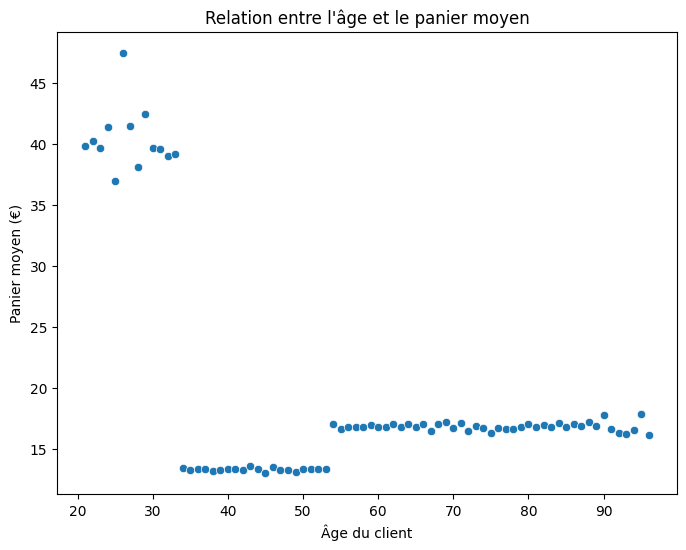

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=panier_moyen['AgeClient'], y=panier_moyen['PanierMoyen'])
plt.title("Relation entre l'âge et le panier moyen")  
plt.xlabel("Âge du client")  
plt.ylabel("Panier moyen (€)")  
plt.show()

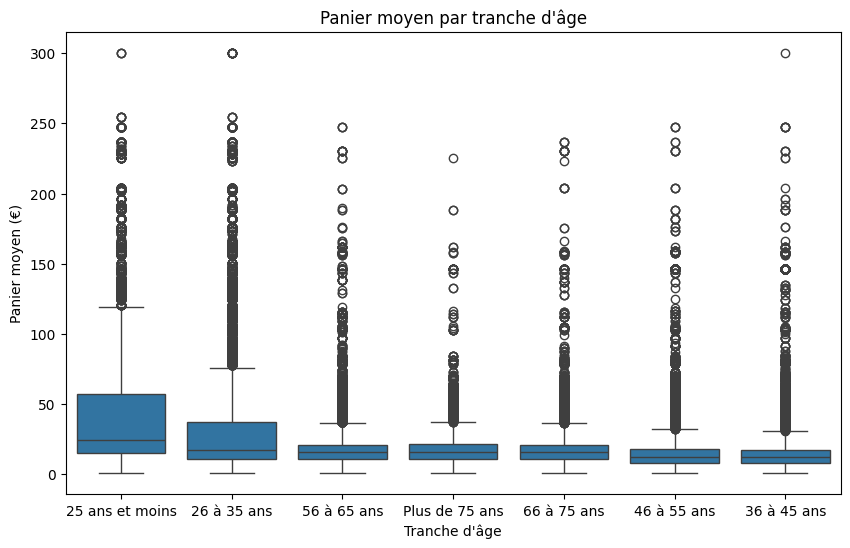

In [30]:
avg_prices_by_age = df.groupby('trancheAge')['price'].mean().sort_values(ascending=False)

# Création du boxplot en triant les tranches d'âge par panier moyen
plt.figure(figsize=(10, 6))
sns.boxplot(x='trancheAge', y='price', data=df, order=avg_prices_by_age.index)

# Titre du graphique et ajustement des labels
plt.title("Panier moyen par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier moyen (€)")

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5 - Lien entre l'age des clients et les catégories des livres achetés
</h3>
</div>

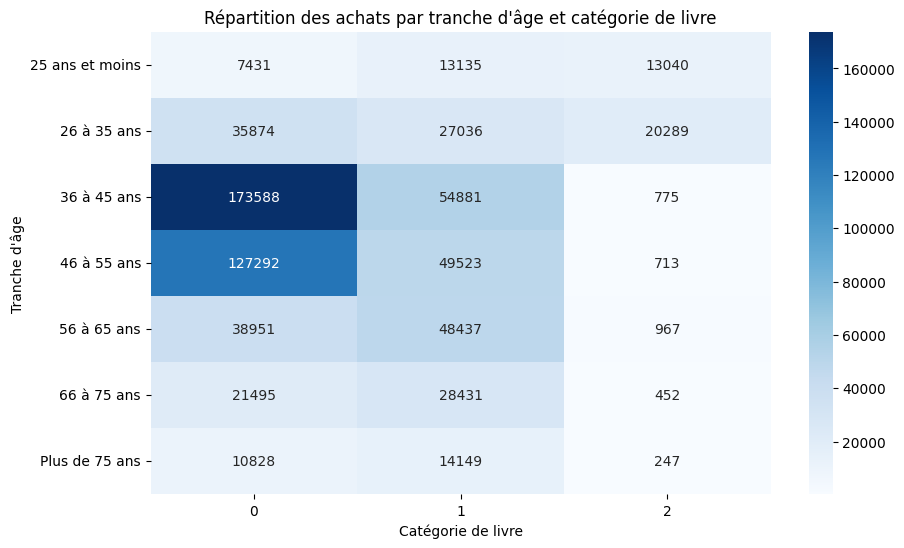

In [31]:
age_categ = df.groupby(['trancheAge', 'categ']).size().reset_index(name='Nb_Achats')
age_categ_pivot = age_categ.pivot(index='trancheAge', columns='categ', values='Nb_Achats')

# Visualiser avec une heatmap  
plt.figure(figsize=(10, 6))
sns.heatmap(age_categ_pivot, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title("Répartition des achats par tranche d'âge et catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.ylabel("Tranche d'âge")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.6 - Top 10 clients
</h3>
</div>

In [32]:
# Calculer la somme des dépenses pour chaque client
total_spent = dc.groupby('client_id')['price'].sum()

# Trier les clients par montant des dépenses
top_clients = total_spent.sort_values(ascending=False)

# Sélectionner les 10 premiers clients
top_10_clients = top_clients.head(10)

# Afficher le DataFrame des 10 clients avec leurs dépenses
print(top_10_clients)

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.6.1 - Profil des 10 meilleurs clients
</h3>
</div>

In [33]:
# Calculer la somme des dépenses pour chaque client
total_depense = dc.groupby('client_id')['price'].sum()

# Trier les clients par montant des dépenses
top_clients = total_depense.sort_values(ascending=False)

# Sélectionner les 10 premiers clients
top_10_clients = top_clients.head(10)

# Joindre ces informations aux autres colonnes de ton DataFrame
top_10_df = dc[dc['client_id'].isin(top_10_clients.index)].drop_duplicates(subset='client_id')

# Ajouter la colonne des dépenses totales aux informations des 10 premiers clients
top_10_df['total_depense'] = top_10_df['client_id'].map(total_depense)

# Sélectionner les colonnes à afficher
top_10_df = top_10_df[['client_id', 'sex', 'AgeClient', 'trancheAge', 'birth', 'total_depense']]
top_10_df = top_10_df.sort_values(by='total_depense', ascending=False)
# Affichage des données
print(top_10_df)


      client_id sex  AgeClient   trancheAge  birth  total_depense
603      c_1609   m         45  36 à 45 ans   1980      326039.89
635      c_4958   m         26  26 à 35 ans   1999      290227.03
637      c_6714   f         57  56 à 65 ans   1968      153918.60
492      c_3454   m         56  56 à 65 ans   1969      114110.57
2643     c_1570   f         46  46 à 55 ans   1979        5285.82
13572    c_3263   f         40  36 à 45 ans   1985        5276.87
15176    c_2140   f         48  46 à 55 ans   1977        5260.18
21847    c_2899   f         31  26 à 35 ans   1994        5214.05
2468     c_7319   f         51  46 à 55 ans   1974        5155.77
2531     c_7959   f         51  46 à 55 ans   1974        5135.75


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.7 - Contingence homme/femme par catégorie
</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.7.1 - Calcul du Khi2
</h3>
</div>

In [34]:
# Création du tableau de contingence
contingence_table = pd.crosstab(df['sex'], df['categ'])

# Calcul des totaux des lignes et colonnes
row_totals = contingence_table.sum(axis=1)
col_totals = contingence_table.sum(axis=0)
total = contingence_table.values.sum()

# Calcul des valeurs attendues sous l'hypothèse d'indépendance
expected = np.outer(row_totals, col_totals) / total  # Produit des marges divisé par le total

# Calcul du khi² manuellement
chi2 = ((contingence_table.values - expected) ** 2 / expected).sum()

# Affichage des résultats
print("Tableau de contingence :\n", contingence_table)
print("\nValeurs attendues :\n", expected)
print("\nStatistique du khi² :", chi2)
print("Plus la statistique khi² est élevée, plus l'écart entre les valeurs attendues et observées est grand → les variables sont probablement liées.")

Tableau de contingence :
 categ       0       1      2
sex                         
f      206103  119307  17283
m      209356  116285  19200

Valeurs attendues :
 [[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]

Statistique du khi² : 158.25417617304882
Plus la statistique khi² est élevée, plus l'écart entre les valeurs attendues et observées est grand → les variables sont probablement liées.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.7.2 - V de Cramer
</h3>
</div>

In [35]:
# Nombre total d'observations
N = contingence_table.values.sum()

# Nombre de catégories (colonnes) et modalités (lignes)
r, k = contingence_table.shape  # r = lignes, k = colonnes

# Calcul de V de Cramer
cramer_v = np.sqrt(chi2 / (N * (min(r, k) - 1)))

print(f"V de Cramer : {cramer_v:.4f}")
print("Avec V de Cramer = 0.0152, on est très proche de 0, ce qui signifie que la corrélation est quasi inexistante.\nLe test du khi² donne une valeur élevée, mais c’est uniquement dû à la grande taille de l’échantillon.\nV de Cramer est extrêmement faible → Les variables 'sex' et 'categ' sont quasiment indépendantes.\nConclusion : Il n'y a pas de véritable relation significative entre le sexe et la catégorie de produit acheté.")

V de Cramer : 0.0152
Avec V de Cramer = 0.0152, on est très proche de 0, ce qui signifie que la corrélation est quasi inexistante.
Le test du khi² donne une valeur élevée, mais c’est uniquement dû à la grande taille de l’échantillon.
V de Cramer est extrêmement faible → Les variables 'sex' et 'categ' sont quasiment indépendantes.
Conclusion : Il n'y a pas de véritable relation significative entre le sexe et la catégorie de produit acheté.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.8 - Test de Pearson
</h3>
</div>

In [36]:
depenses = dc['price']
age_client = dc['AgeClient']

# Calculer les moyennes de chaque variable
moyenne_depenses = np.mean(depenses)
moyenne_age_client = np.mean(age_client)

# Calculer les écarts par rapport à la moyenne
ecarts_depenses = depenses - moyenne_depenses
ecarts_age_client = age_client - moyenne_age_client

# Calculer le numérateur et les dénominateurs de la formule de Pearson
numerateur = np.sum(ecarts_depenses * ecarts_age_client)
denominateur = np.sqrt(np.sum(ecarts_depenses**2) * np.sum(ecarts_age_client**2))

# Calculer le coefficient de corrélation de Pearson
corr_pearson = round((numerateur / denominateur), 2)

# Afficher les résultats
print(f"Coefficient de corrélation de Pearson: {corr_pearson}")
print(f"Le coefficient de corrélation de Pearson de {corr_pearson} indique une corrélation faible et négative entre les dépenses et l'âge des clients.")

Coefficient de corrélation de Pearson: -0.21
Le coefficient de corrélation de Pearson de -0.21 indique une corrélation faible et négative entre les dépenses et l'âge des clients.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.8 - Test de Student
</h3>
</div>

In [37]:
# Compter le nombre d'hommes et de femmes
count_sex = df['sex'].value_counts()

# Affichage des résultats
print(f"Nombre d'hommes : {count_sex['m']}")
print(f"Nombre de femmes : {count_sex['f']}")

Nombre d'hommes : 344841
Nombre de femmes : 342693


In [38]:
# Séparer les prix par sexe
prix_hommes = df[df['sex'] == 'm']['price']
prix_femmes = df[df['sex'] == 'f']['price']


# Séparer les données en deux groupes: masculin et féminin
prix_hommes = df[df['sex'] == 'm']['price']
prix_femmes = df[df['sex'] == 'f']['price']

# Test t de Student
t_stat, p_val = stats.ttest_ind(prix_hommes, prix_femmes, equal_var=False)

# Afficher les résultats
print(f"Statistique t: {t_stat}")
print(f"Valeur p: {p_val}")

# Interprétation du résultat
alpha = 0.05  # Niveau de significativité de 5%
if p_val < alpha:
    print("Il y a une différence significative entre les prix des hommes et des femmes.")
else:
    print("Il n'y a pas de différence significative entre les prix des hommes et des femmes.")


Statistique t: 5.84645812922806
Valeur p: 5.023760057399999e-09
Il y a une différence significative entre les prix des hommes et des femmes.


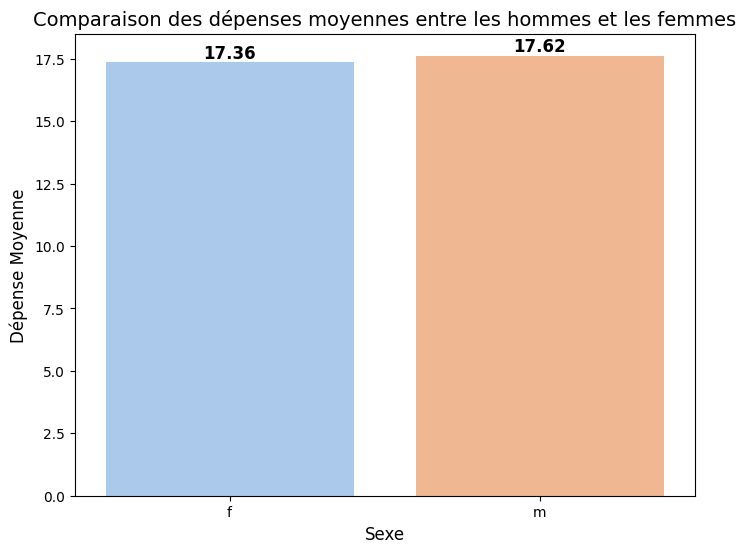

In [39]:
# Calculer la moyenne des dépenses pour chaque sexe
moyenne_depense = df.groupby('sex', as_index=False)['price'].mean()
moyenne_depense.rename(columns={'price': 'prix_moyen'}, inplace=True)

# Création du graphique en barres
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=moyenne_depense, x='sex', y='prix_moyen', hue='sex', palette='pastel', legend=False)

# Ajouter les valeurs sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titre et labels
plt.title('Comparaison des dépenses moyennes entre les hommes et les femmes', fontsize=14)
plt.xlabel('Sexe', fontsize=12)
plt.ylabel('Dépense Moyenne', fontsize=12)

# Affichage du graphique
plt.show()


In [40]:
# Calculer le total des dépenses pour les hommes et les femmes
total_depense_hommes = df[df['sex'] == 'm']['price'].sum()
total_depense_femmes = df[df['sex'] == 'f']['price'].sum()

# Affichage des résultats
print(f"Total des dépenses des hommes : {total_depense_hommes:.2f}")
print(f"Total des dépenses des femmes : {total_depense_femmes:.2f}")

Total des dépenses des hommes : 6076819.42
Total des dépenses des femmes : 5950843.68


👉 Ce que ça signifie ?
Oui, statistiquement, c'est "significatif" (p < 0.05).
Mais en pratique, la différence est insignifiante (0,26 € sur 17 €).
L'effet réel est minuscule → pas de vraie inégalité ou de tendance notable.